#**Klasifikacija početnog dataseta**

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import glob

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/POOS vjezbe Colab/POOS Projekat/dataset/train'
TEST_DIR = '/content/drive/MyDrive/POOS vjezbe Colab/POOS Projekat/dataset/test'
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [ ]:
print(len(train_images),
len(test_images))

13460 3370


In [ ]:
def get_labels(fname):
    '''
    This function return the labels of the image from image path
    '''
    parts = re.split('/',fname)[-1]
    part=re.split(r'(\d+)',parts)
    print(part[0])
    return part[0]

In [ ]:
#storing path and label of training image in a list
path_and_label_train=[]
for filename in glob.glob('/content/drive/MyDrive/POOS vjezbe Colab/POOS Projekat/dataset/train/*.jpg'):
    path_and_label_train.append([filename,get_labels(filename)])

Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
qaf
reh
qaf
seen
lam
qaf
seen
noon
seen
sad
reh
seen
noon
noon
khah
reh
sad
sheen
reh
meem
seen
reh
noon
noon
reh
khah
noon
reh
seen
noon
meem
seen
sad
sheen
qaf
sheen
noon
noon
sheen
lam
sad
sad
reh
noon
qaf
meem
qaf
sad
sad
lam
reh
qaf
sad
sheen
sad
khah
sheen
sheen
reh
qaf
meem
reh
lam
meem
qaf
sad
sheen
lam
reh
seen
lam
qaf
sheen
lam
reh
lam
seen
sad
qaf
qaf
lam
reh
reh
seen
sheen
seen
meem
sad
qaf
reh
meem
qaf
sad
meem
sad
lam
noon
sheen
sheen
sad
sad
sheen
seen
qaf
seen
noon
sheen
sheen
noon
reh
meem
reh
noon
sheen
sad
sad
noon
meem
meem
seen
sad
reh
meem
noon
reh
khah
lam
reh
reh
noon
qaf
sheen
seen
noon
noon
sad
sheen
khah
reh
seen
noon
reh
meem
sad
lam
noon
khah
noon
qaf
lam
reh
sheen
qaf
reh
sheen
sad
sad
meem
reh
meem
meem
lam
qaf
noon
sheen
lam
reh
lam
reh
sad
lam
noon
khah
sheen
reh
sheen
reh
noon
lam
seen
reh
noon
noon
qaf
reh
lam
qaf
meem
noon
khah
meem
sheen
sad
meem
sad
sad
lam
qaf
lam
lam
qaf
noon
meem
s

In [ ]:
#converting the list to dataframe
df_train=pd.DataFrame(path_and_label_train,columns = ['path','label'])

In [ ]:
#overview of training dataframe
df_train.head()

,path,label
0,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,alef
1,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,jeem
2,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,ain
3,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,dal
4,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,seen


In [ ]:
#provjera
df_train.nunique()

path     13460
label       28
dtype: int64

In [ ]:
df_train["label"].unique()

array(['alef', 'jeem', 'ain', 'dal', 'seen', 'sheen', 'feh', 'zah',
       'thal', 'theh', 'tah', 'ghain', 'yeh', 'noon', 'kaf', 'zain',
       'beh', 'lam', 'khah', 'meem', 'hah', 'dad', 'waw', 'reh', 'heh',
       'teh', 'sad', 'qaf'], dtype=object)

In [ ]:
#storing path and label of test image in a list
path_and_label_test=[]
for filename in glob.glob('/content/drive/MyDrive/POOS vjezbe Colab/POOS Projekat/dataset/test/*.jpg'):
    path_and_label_test.append([filename,get_labels(filename)])

thal
khah
ain
sad
jeem
kaf
zain
theh
reh
thal
zah
lam
beh
noon
hah
lam
hah
yeh
jeem
yeh
lam
qaf
sad
teh
zain
meem
ain
zah
hah
meem
ghain
kaf
waw
thal
reh
zah
thal
khah
sad
thal
thal
sad
waw
theh
alef
kaf
dal
zain
ain
kaf
theh
meem
zah
qaf
khah
meem
reh
jeem
zain
thal
sad
dal
heh
feh
seen
zah
reh
meem
jeem
ain
reh
qaf
waw
zah
noon
tah
teh
tah
thal
tah
reh
teh
sheen
sheen
tah
tah
sad
reh
teh
tah
tah
sad
tah
theh
sheen
theh
reh
sheen
thal
tah
sad
sad
tah
reh
sheen
tah
thal
tah
thal
seen
sheen
sad
teh
sheen
sheen
tah
reh
theh
thal
thal
reh
seen
reh
reh
sheen
tah
teh
thal
teh
tah
teh
sad
reh
tah
tah
tah
teh
tah
teh
reh
teh
reh
teh
teh
sad
thal
seen
thal
sheen
thal
teh
thal
sad
thal
thal
teh
thal
sad
sad
sheen
teh
sheen
tah
tah
sad
seen
sheen
sheen
teh
teh
tah
sad
teh
sad
seen
thal
seen
tah
thal
tah
teh
teh
sheen
reh
sad
reh
reh
teh
qaf
theh
tah
seen
sad
sheen
reh
thal
seen
sad
seen
seen
tah
teh
sad
teh
sad
sad
sad
sad
reh
tah
tah
sheen
sheen
theh
theh
sheen
tah
reh
thal
seen
seen
reh
tah
th

In [ ]:
#storing path of the image as dataframe
#path_test=[]
#for filename in glob.glob('/content/drive/MyDrive/POOS vjezbe Colab/POOS Projekat/dataset/test/*.jpg'):
 #   path_test.append(filename)

In [ ]:

#converting the list to dataframe
df_test=pd.DataFrame(path_and_label_test,columns = ['path','label'])

df_test.head()

,path,label
0,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,thal
1,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,khah
2,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,ain
3,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,sad
4,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,jeem


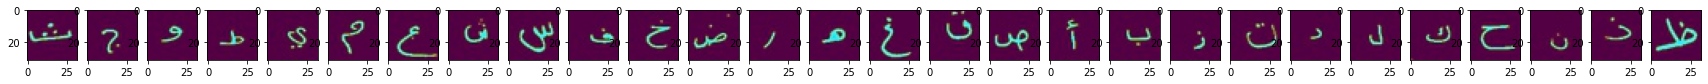

In [ ]:
#overview of some data of training images from each class
fig, ax = plt.subplots(1, 28, figsize=(30, 12))
for i,name in enumerate(set(df_train['label'])):
    sample = df_train[df_train['label'] == name].sample(1)
    image_path=sample['path'].item()
    X = cv2.imread(image_path)
    ax[i].imshow(X)

In [ ]:
def read_image(path):
    '''
    this function read the image by using opencv and return image
    '''
    img=cv2.imread(path)
    return img

In [ ]:
N = df_train.shape[0]
print(N)
x_train = np.empty((N, 32, 32, 3), dtype=np.uint8)
for i, path in enumerate((df_train['path'])):
    x_train[i, :, :, :] = read_image(path)
    #print(read_image(path))

13460


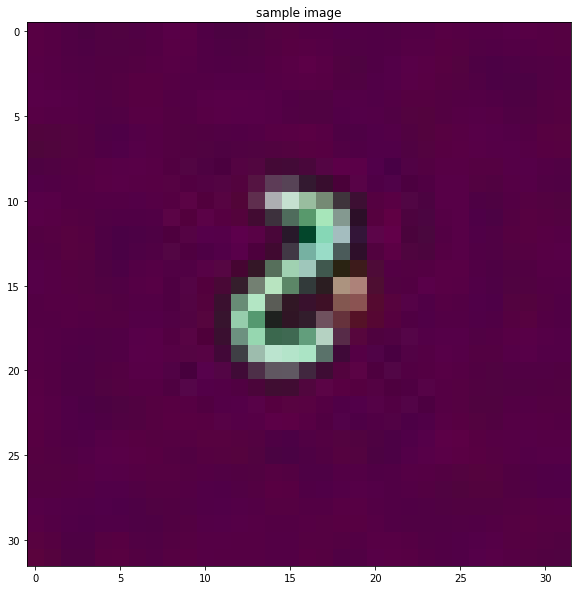

In [ ]:
fig=plt.figure(figsize=(20, 10))
plt.title('sample image')
plt.imshow(x_train[1])

In [ ]:
N = df_test.shape[0]
x_test = np.empty((N, 32, 32, 3), dtype=np.uint8)
for i, path in enumerate((df_test['path'])):
    x_test[i, :, :, :] = read_image(path)

In [ ]:
x_test

array([[[[85,  0, 68],
         [85,  0, 68],
         [83,  0, 69],
         ...,
         [76,  3, 65],
         [81,  2, 65],
         [85,  2, 64]],

        [[85,  0, 68],
         [85,  0, 68],
         [83,  0, 69],
         ...,
         [78,  2, 66],
         [83,  1, 66],
         [85,  1, 65]],

        [[85,  0, 68],
         [85,  0, 68],
         [85,  0, 69],
         ...,
         [80,  1, 68],
         [85,  0, 69],
         [87,  0, 69]],

        ...,

        [[85,  0, 71],
         [85,  0, 69],
         [83,  1, 66],
         ...,
         [85,  1, 66],
         [83,  1, 66],
         [81,  1, 66]],

        [[85,  0, 72],
         [85,  0, 71],
         [83,  0, 68],
         ...,
         [83,  0, 68],
         [85,  0, 68],
         [85,  0, 68]],

        [[85,  0, 72],
         [83,  0, 71],
         [83,  0, 68],
         ...,
         [83,  0, 69],
         [85,  0, 69],
         [87,  0, 69]]],


       [[[85,  1, 66],
         [85,  1, 66],
         [83, 

In [ ]:
y_test = df_test['label'].tolist()

In [ ]:
y_test

['thal',
 'khah',
 'ain',
 'sad',
 'jeem',
 'kaf',
 'zain',
 'theh',
 'reh',
 'thal',
 'zah',
 'lam',
 'beh',
 'noon',
 'hah',
 'lam',
 'hah',
 'yeh',
 'jeem',
 'yeh',
 'lam',
 'qaf',
 'sad',
 'teh',
 'zain',
 'meem',
 'ain',
 'zah',
 'hah',
 'meem',
 'ghain',
 'kaf',
 'waw',
 'thal',
 'reh',
 'zah',
 'thal',
 'khah',
 'sad',
 'thal',
 'thal',
 'sad',
 'waw',
 'theh',
 'alef',
 'kaf',
 'dal',
 'zain',
 'ain',
 'kaf',
 'theh',
 'meem',
 'zah',
 'qaf',
 'khah',
 'meem',
 'reh',
 'jeem',
 'zain',
 'thal',
 'sad',
 'dal',
 'heh',
 'feh',
 'seen',
 'zah',
 'reh',
 'meem',
 'jeem',
 'ain',
 'reh',
 'qaf',
 'waw',
 'zah',
 'noon',
 'tah',
 'teh',
 'tah',
 'thal',
 'tah',
 'reh',
 'teh',
 'sheen',
 'sheen',
 'tah',
 'tah',
 'sad',
 'reh',
 'teh',
 'tah',
 'tah',
 'sad',
 'tah',
 'theh',
 'sheen',
 'theh',
 'reh',
 'sheen',
 'thal',
 'tah',
 'sad',
 'sad',
 'tah',
 'reh',
 'sheen',
 'tah',
 'thal',
 'tah',
 'thal',
 'seen',
 'sheen',
 'sad',
 'teh',
 'sheen',
 'sheen',
 'tah',
 'reh',
 'theh',


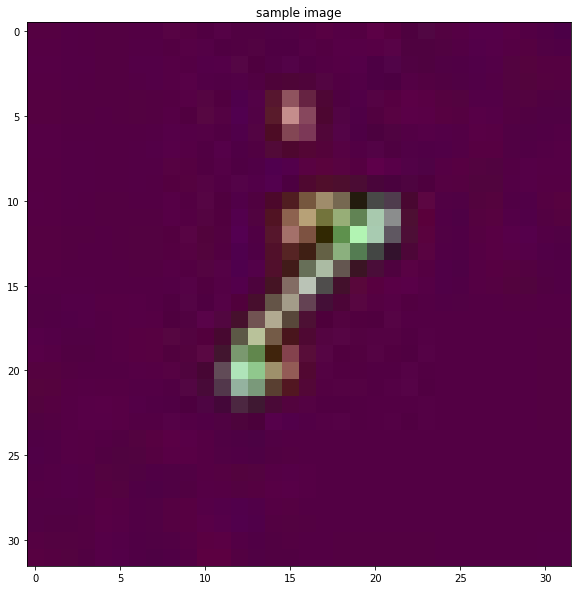

In [ ]:
fig=plt.figure(figsize=(20, 10))
plt.title('sample image')
plt.imshow(x_test[1])
#print(x_test[1])

In [ ]:
print(x_train[10].shape)
print(x_test[40].shape)

(32, 32, 3)
(32, 32, 3)


In [ ]:
#converting labels from string to int
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y_train=lb.fit_transform(df_train['label'])

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train, num_classes=28)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten

def create_model(activation='relu', optimizer='adam', kernel_initializer='he_normal'):
    '''
    This function will create a sequential CNN model, which is being utilized inorder to lean patterns and classify classes
    '''
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3), activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32, activation= activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(28, activation='softmax'))

    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                   metrics=['accuracy'])
    return model

In [ ]:
#model summary
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                        

In [ ]:
# early stopping helps in stopping model early to avoid overfitting
from keras.callbacks import Callback, EarlyStopping
early_stop = EarlyStopping(
                monitor='val_loss',
                mode='auto',
                verbose=1,
                patience=8
              )

In [ ]:
#model training
history=model.fit(x_train, y_train,
                    validation_split=0.3,
                    callbacks=[early_stop],
                    epochs=1000, batch_size=64, verbose=1)

Epoch 1/1000
148/148 [==============================] - 22s 142ms/step - loss: 2.7725 - accuracy: 0.3905 - val_loss: 4.7257 - val_accuracy: 0.0369
Epoch 2/1000
148/148 [==============================] - 20s 139ms/step - loss: 1.5606 - accuracy: 0.6738 - val_loss: 3.0915 - val_accuracy: 0.1657
Epoch 3/1000
148/148 [==============================] - 20s 138ms/step - loss: 1.0892 - accuracy: 0.7771 - val_loss: 2.2551 - val_accuracy: 0.3135
Epoch 4/1000
148/148 [==============================] - 20s 138ms/step - loss: 0.8280 - accuracy: 0.8336 - val_loss: 1.7372 - val_accuracy: 0.4733
Epoch 5/1000
148/148 [==============================] - 20s 138ms/step - loss: 0.6835 - accuracy: 0.8697 - val_loss: 1.1950 - val_accuracy: 0.6694
Epoch 6/1000
148/148 [==============================] - 20s 139ms/step - loss: 0.5902 - accuracy: 0.8949 - val_loss: 1.1891 - val_accuracy: 0.6459
Epoch 7/1000
148/148 [==============================] - 21s 142ms/step - loss: 0.5361 - accuracy: 0.9087 - val_loss: 1

In [ ]:
#plotting accuracy of model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
# plotting loss of model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
#plt.ylabel('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
#saving model weights
model.save('AHR.h5')

In [ ]:
# model predictions and decoding
pred=model.predict(x_test)
res=np.argmax(pred,axis=1)
res=lb.inverse_transform(res)
res[:5]

In [ ]:
#prediction as title and test images
fig, axs = plt.subplots(2, 2,figsize=(20,8))
axs[0, 0].imshow(x_test[2])
axs[0, 0].set_title(res[2])
axs[0, 1].imshow(x_test[8])
axs[0, 1].set_title(res[8])
axs[1, 0].imshow(x_test[232])
axs[1, 0].set_title(res[232])
axs[1, 1].imshow(x_test[3305])
axs[1, 1].set_title(res[3305])
plt.show()

In [ ]:
#storing predictions in test dataframe
#df_test['label']=res
#df_test.head()

In [ ]:
#y predikcija
res.shape

In [ ]:
#y_test
df_test['label'].shape

In [ ]:
#ACCURACY test seta
from sklearn import metrics
acc = metrics.accuracy_score(df_test['label'], res)
print(acc)

#**Klasifikacija nad preprocesiranim podacima**

In [ ]:
# python program to demonstrate the rotation shift of the image with the rotation_range argument

# we import all our required libraries
from numpy import expand_dims
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array


from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# we first load the image
#image = load_img('parrot.jpg')
image = x_train[1]
# we converting the image which is in PIL format into the numpy array, so that we can apply deep learning methods
dataImage = img_to_array(image)
# print(dataImage)
# expanding dimension of the load image
imageNew = expand_dims(dataImage, 0)
# now here below we creating the object of the data augmentation class
imageDataGen = ImageDataGenerator(rotation_range=25)
# because as we alreay load image into the memory, so we are using flow() function, to apply transformation
iterator = imageDataGen.flow(imageNew, batch_size=1)
# below we generate augmented images and plotting for visualization
image = []
for i in range(3):
	# we are below define the subplot
	pyplot.subplot(330 + 1 + i)
	# generating images of each batch
	batch = iterator.next()
	# again we convert back to the unsigned integers value of the image for viewing
	image.append(batch[0].astype('uint8'))
	# we plot here raw pixel data
	pyplot.imshow(image[i])
# visualize the the figure
pyplot.show()

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/POOS vjezbe Colab/POOS Projekat/dataset/train'
TEST_DIR = '/content/drive/MyDrive/POOS vjezbe Colab/POOS Projekat/dataset/test'
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [ ]:
print(len(train_images),
len(test_images))

13460 3370


In [ ]:
def get_labels(fname):
    '''
    This function return the labels of the image from image path
    '''
    parts = re.split('/',fname)[-1]
    part=re.split(r'(\d+)',parts)
    print(part[0])
    return part[0]

In [ ]:
#storing path and label of training image in a list
path_and_label_train=[]
for filename in glob.glob('/content/drive/MyDrive/POOS vjezbe Colab/POOS Projekat/dataset/train/*.jpg'):
    path_and_label_train.append([filename,get_labels(filename)])

Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
qaf
reh
qaf
seen
lam
qaf
seen
noon
seen
sad
reh
seen
noon
noon
khah
reh
sad
sheen
reh
meem
seen
reh
noon
noon
reh
khah
noon
reh
seen
noon
meem
seen
sad
sheen
qaf
sheen
noon
noon
sheen
lam
sad
sad
reh
noon
qaf
meem
qaf
sad
sad
lam
reh
qaf
sad
sheen
sad
khah
sheen
sheen
reh
qaf
meem
reh
lam
meem
qaf
sad
sheen
lam
reh
seen
lam
qaf
sheen
lam
reh
lam
seen
sad
qaf
qaf
lam
reh
reh
seen
sheen
seen
meem
sad
qaf
reh
meem
qaf
sad
meem
sad
lam
noon
sheen
sheen
sad
sad
sheen
seen
qaf
seen
noon
sheen
sheen
noon
reh
meem
reh
noon
sheen
sad
sad
noon
meem
meem
seen
sad
reh
meem
noon
reh
khah
lam
reh
reh
noon
qaf
sheen
seen
noon
noon
sad
sheen
khah
reh
seen
noon
reh
meem
sad
lam
noon
khah
noon
qaf
lam
reh
sheen
qaf
reh
sheen
sad
sad
meem
reh
meem
meem
lam
qaf
noon
sheen
lam
reh
lam
reh
sad
lam
noon
khah
sheen
reh
sheen
reh
noon
lam
seen
reh
noon
noon
qaf
reh
lam
qaf
meem
noon
khah
meem
sheen
sad
meem
sad
sad
lam
qaf
lam
lam
qaf
noon
meem
s

In [ ]:
#converting the list to dataframe
df_train=pd.DataFrame(path_and_label_train,columns = ['path','label'])

In [ ]:
#overview of training dataframe
df_train.head()

,path,label
0,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,alef
1,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,jeem
2,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,ain
3,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,dal
4,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,seen


In [ ]:
#provjera
df_train.nunique()

path     13460
label       28
dtype: int64

In [ ]:
df_train["label"].unique()

array(['alef', 'jeem', 'ain', 'dal', 'seen', 'sheen', 'feh', 'zah',
       'thal', 'theh', 'tah', 'ghain', 'yeh', 'noon', 'kaf', 'zain',
       'beh', 'lam', 'khah', 'meem', 'hah', 'dad', 'waw', 'reh', 'heh',
       'teh', 'sad', 'qaf'], dtype=object)

In [ ]:
#storing path and label of test image in a list
path_and_label_test=[]
for filename in glob.glob('/content/drive/MyDrive/POOS vjezbe Colab/POOS Projekat/dataset/test/*.jpg'):
    path_and_label_test.append([filename,get_labels(filename)])

thal
khah
ain
sad
jeem
kaf
zain
theh
reh
thal
zah
lam
beh
noon
hah
lam
hah
yeh
jeem
yeh
lam
qaf
sad
teh
zain
meem
ain
zah
hah
meem
ghain
kaf
waw
thal
reh
zah
thal
khah
sad
thal
thal
sad
waw
theh
alef
kaf
dal
zain
ain
kaf
theh
meem
zah
qaf
khah
meem
reh
jeem
zain
thal
sad
dal
heh
feh
seen
zah
reh
meem
jeem
ain
reh
qaf
waw
zah
noon
tah
teh
tah
thal
tah
reh
teh
sheen
sheen
tah
tah
sad
reh
teh
tah
tah
sad
tah
theh
sheen
theh
reh
sheen
thal
tah
sad
sad
tah
reh
sheen
tah
thal
tah
thal
seen
sheen
sad
teh
sheen
sheen
tah
reh
theh
thal
thal
reh
seen
reh
reh
sheen
tah
teh
thal
teh
tah
teh
sad
reh
tah
tah
tah
teh
tah
teh
reh
teh
reh
teh
teh
sad
thal
seen
thal
sheen
thal
teh
thal
sad
thal
thal
teh
thal
sad
sad
sheen
teh
sheen
tah
tah
sad
seen
sheen
sheen
teh
teh
tah
sad
teh
sad
seen
thal
seen
tah
thal
tah
teh
teh
sheen
reh
sad
reh
reh
teh
qaf
theh
tah
seen
sad
sheen
reh
thal
seen
sad
seen
seen
tah
teh
sad
teh
sad
sad
sad
sad
reh
tah
tah
sheen
sheen
theh
theh
sheen
tah
reh
thal
seen
seen
reh
tah
th

In [ ]:

#converting the list to dataframe
df_test=pd.DataFrame(path_and_label_test,columns = ['path','label'])

df_test.head()

,path,label
0,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,thal
1,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,khah
2,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,ain
3,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,sad
4,/content/drive/MyDrive/POOS vjezbe Colab/POOS ...,jeem


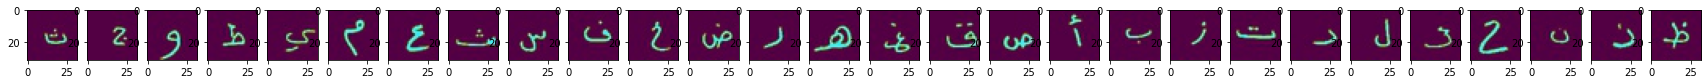

In [ ]:
#overview of some data of training images from each class
fig, ax = plt.subplots(1, 28, figsize=(30, 12))
for i,name in enumerate(set(df_train['label'])):
    sample = df_train[df_train['label'] == name].sample(1)
    image_path=sample['path'].item()
    X = cv2.imread(image_path)
    ax[i].imshow(X)

In [ ]:
def read_image(path):
    '''
    this function read the image by using opencv and return image
    '''
    img=cv2.imread(path)
    return img

In [ ]:
N = df_train.shape[0]
print(N)
x_train = np.empty((N, 32, 32, 3), dtype=np.uint8)
for i, path in enumerate((df_train['path'])):
    x_train[i, :, :, :] = read_image(path)
    #print(read_image(path))

AttributeError: ignored

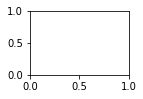

In [ ]:
#ovdje za svaku sliku iz x_train uraditi rotaciju i dodati u x_train i y_train    ????????????????

# python program to demonstrate the rotation shift of the image with the rotation_range argument

# we import all our required libraries
from numpy import expand_dims
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

novi = []
# we first load the image
for j in range (0, len(x_train)):
  image = x_train[j]
  # we converting the image which is in PIL format into the numpy array, so that we can apply deep learning methods
  dataImage = img_to_array(image)
  # expanding dimension of the load image
  imageNew = expand_dims(dataImage, 0)
  # now here below we creating the object of the data augmentation class
  imageDataGen = ImageDataGenerator(rotation_range=25)
  # because as we alreay load image into the memory, so we are using flow() function, to apply transformation
  iterator = imageDataGen.flow(imageNew, batch_size=1)
  # below we generate augmented images and plotting for visualization
  imageNiz = []
  for i in range(3):
    # we are below define the subplot
    pyplot.subplot(330 + 1 + i)
    # generating images of each batch
    batch = iterator.next()
    # again we convert back to the unsigned integers value of the image for viewing
    #######imageNiz.append(batch[0].astype('uint8'))
    novi.append(batch[0].astype('uint8'))
    y_train.append(y_train[j])
    # we plot here raw pixel data
    #pyplot.imshow(imageNiz[i])
  # visualize the the figure
  #pyplot.show()

In [ ]:
import albumentations
import pandas as pd
import cv2
import os
import numpy as np
import argparse
from imutils import paths
from tqdm import tqdm
parser = argparse.ArgumentParser()
parser.add_argument('-n', '--num', default=50, type=int,
                    help='number of images to augment')
args = vars(parser.parse_args())
# the augmentations
aug = albumentations.Compose([
                albumentations.Resize(224, 224, always_apply=True),
                albumentations.HorizontalFlip(p=1.0),
                albumentations.ShiftScaleRotate(
                    shift_limit=0.3,
                    scale_limit=0.3,
                    rotate_limit=30,
                    p=1.0
                )
            ])
# read image paths from data.csv file
data = pd.read_csv('../input/data.csv')
image_paths = list(paths.list_images('../input/chessman-image-dataset/Chess'))
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label not in labels:
        labels.append(label)
print(labels)
for i, label in tqdm(enumerate(labels), total=len(labels)):
    path = '../input/chessman-image-dataset/Chess/'
    images = os.listdir(path+label)
    for i in range(len(images)):
        if images[i].split('.')[-1] != 'gif':
            image = cv2.imread(f"{path+label}/{images[i]}")
            aug_image = aug(image=np.array(image))['image']
            cv2.imwrite((f"{path+label}/aug_{i}.jpg"), aug_image)


usage: ipykernel_launcher.py [-h] [-n NUM]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-4448cc88-a30a-4d16-8e29-e778f9cd9259.json


SystemExit: ignored

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
print(len(x_train), len(y_train))

13460 13460


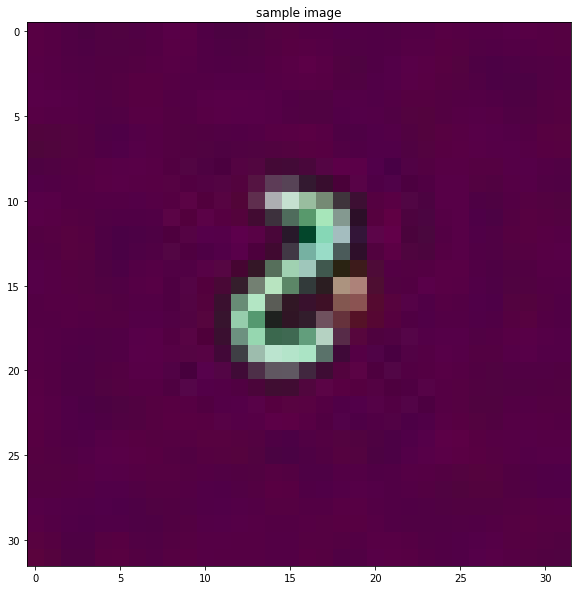

In [ ]:
fig=plt.figure(figsize=(20, 10))
plt.title('sample image')
plt.imshow(x_train[1])

In [ ]:
N = df_test.shape[0]
x_test = np.empty((N, 32, 32, 3), dtype=np.uint8)
for i, path in enumerate((df_test['path'])):
    x_test[i, :, :, :] = read_image(path)

In [ ]:
x_test

array([[[[85,  0, 68],
         [85,  0, 68],
         [83,  0, 69],
         ...,
         [76,  3, 65],
         [81,  2, 65],
         [85,  2, 64]],

        [[85,  0, 68],
         [85,  0, 68],
         [83,  0, 69],
         ...,
         [78,  2, 66],
         [83,  1, 66],
         [85,  1, 65]],

        [[85,  0, 68],
         [85,  0, 68],
         [85,  0, 69],
         ...,
         [80,  1, 68],
         [85,  0, 69],
         [87,  0, 69]],

        ...,

        [[85,  0, 71],
         [85,  0, 69],
         [83,  1, 66],
         ...,
         [85,  1, 66],
         [83,  1, 66],
         [81,  1, 66]],

        [[85,  0, 72],
         [85,  0, 71],
         [83,  0, 68],
         ...,
         [83,  0, 68],
         [85,  0, 68],
         [85,  0, 68]],

        [[85,  0, 72],
         [83,  0, 71],
         [83,  0, 68],
         ...,
         [83,  0, 69],
         [85,  0, 69],
         [87,  0, 69]]],


       [[[85,  1, 66],
         [85,  1, 66],
         [83, 

In [ ]:
y_test = df_test['label'].tolist()

In [ ]:
y_test

['thal',
 'khah',
 'ain',
 'sad',
 'jeem',
 'kaf',
 'zain',
 'theh',
 'reh',
 'thal',
 'zah',
 'lam',
 'beh',
 'noon',
 'hah',
 'lam',
 'hah',
 'yeh',
 'jeem',
 'yeh',
 'lam',
 'qaf',
 'sad',
 'teh',
 'zain',
 'meem',
 'ain',
 'zah',
 'hah',
 'meem',
 'ghain',
 'kaf',
 'waw',
 'thal',
 'reh',
 'zah',
 'thal',
 'khah',
 'sad',
 'thal',
 'thal',
 'sad',
 'waw',
 'theh',
 'alef',
 'kaf',
 'dal',
 'zain',
 'ain',
 'kaf',
 'theh',
 'meem',
 'zah',
 'qaf',
 'khah',
 'meem',
 'reh',
 'jeem',
 'zain',
 'thal',
 'sad',
 'dal',
 'heh',
 'feh',
 'seen',
 'zah',
 'reh',
 'meem',
 'jeem',
 'ain',
 'reh',
 'qaf',
 'waw',
 'zah',
 'noon',
 'tah',
 'teh',
 'tah',
 'thal',
 'tah',
 'reh',
 'teh',
 'sheen',
 'sheen',
 'tah',
 'tah',
 'sad',
 'reh',
 'teh',
 'tah',
 'tah',
 'sad',
 'tah',
 'theh',
 'sheen',
 'theh',
 'reh',
 'sheen',
 'thal',
 'tah',
 'sad',
 'sad',
 'tah',
 'reh',
 'sheen',
 'tah',
 'thal',
 'tah',
 'thal',
 'seen',
 'sheen',
 'sad',
 'teh',
 'sheen',
 'sheen',
 'tah',
 'reh',
 'theh',


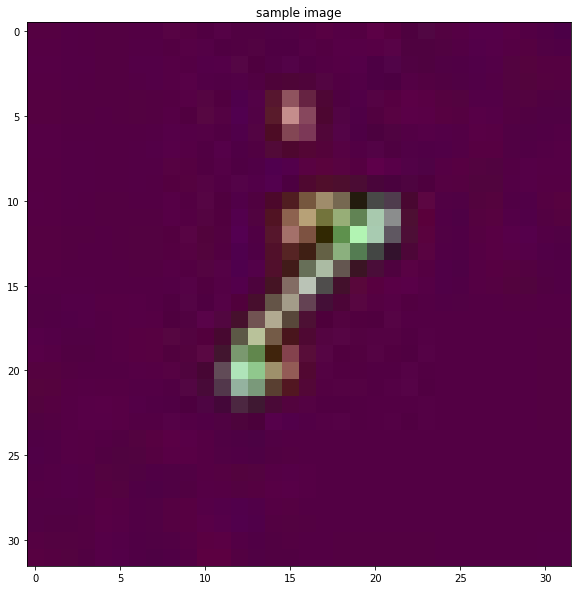

In [ ]:
fig=plt.figure(figsize=(20, 10))
plt.title('sample image')
plt.imshow(x_test[1])
#print(x_test[1])

In [ ]:
print(x_train[10].shape)
print(x_test[40].shape)

(32, 32, 3)
(32, 32, 3)


In [ ]:
#converting labels from string to int
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y_train=lb.fit_transform(df_train['label'])

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train, num_classes=28)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten

def create_model(activation='relu', optimizer='adam', kernel_initializer='he_normal'):
    '''
    This function will create a sequential CNN model, which is being utilized inorder to lean patterns and classify classes
    '''
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3), activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32, activation= activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(28, activation='softmax'))

    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                   metrics=['accuracy'])
    return model

In [ ]:
#model summary
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                      

In [ ]:
# early stopping helps in stopping model early to avoid overfitting
from keras.callbacks import Callback, EarlyStopping
early_stop = EarlyStopping(
                monitor='val_loss',
                mode='auto',
                verbose=1,
                patience=8
              )

In [ ]:
#model training
history=model.fit(x_train, y_train,
                    validation_split=0.3,
                    callbacks=[early_stop],
                    epochs=1000, batch_size=64, verbose=1)

Epoch 1/1000
148/148 [==============================] - 22s 141ms/step - loss: 2.6528 - accuracy: 0.4201 - val_loss: 5.1239 - val_accuracy: 0.0508
Epoch 2/1000
148/148 [==============================] - 20s 135ms/step - loss: 1.4505 - accuracy: 0.6954 - val_loss: 2.6593 - val_accuracy: 0.2263
Epoch 3/1000
148/148 [==============================] - 20s 135ms/step - loss: 1.0059 - accuracy: 0.7934 - val_loss: 2.1070 - val_accuracy: 0.3576
Epoch 4/1000
148/148 [==============================] - 20s 135ms/step - loss: 0.7837 - accuracy: 0.8531 - val_loss: 1.9305 - val_accuracy: 0.3757
Epoch 5/1000
148/148 [==============================] - 20s 136ms/step - loss: 0.6451 - accuracy: 0.8802 - val_loss: 1.3412 - val_accuracy: 0.6273
Epoch 6/1000
148/148 [==============================] - 20s 134ms/step - loss: 0.5538 - accuracy: 0.9047 - val_loss: 1.1432 - val_accuracy: 0.6674
Epoch 7/1000
148/148 [==============================] - 20s 138ms/step - loss: 0.5012 - accuracy: 0.9171 - val_loss: 1

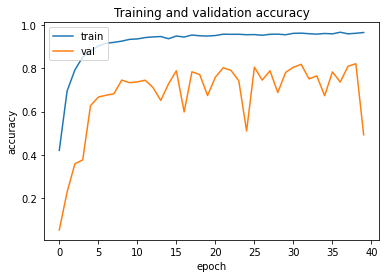

In [ ]:
#plotting accuracy of model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Text(0.5, 0, 'epoch')

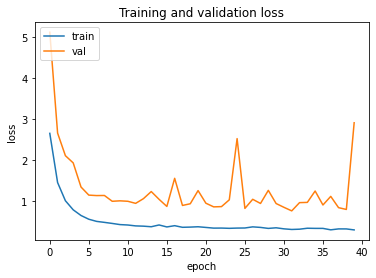

In [ ]:
# plotting loss of model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
#plt.ylabel('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
#saving model weights
model.save('AHR.h5')

In [ ]:
# model predictions and decoding
pred=model.predict(x_test)
res=np.argmax(pred,axis=1)
res=lb.inverse_transform(res)
res[:5]

106/106 [==============================] - 2s 19ms/step


array(['thal', 'zain', 'ghain', 'dad', 'jeem'], dtype=object)

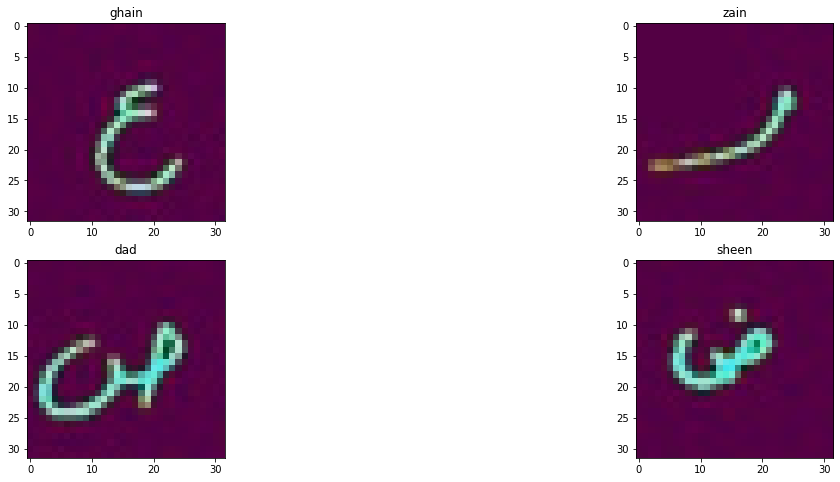

In [ ]:
#prediction as title and test images
fig, axs = plt.subplots(2, 2,figsize=(20,8))
axs[0, 0].imshow(x_test[2])
axs[0, 0].set_title(res[2])
axs[0, 1].imshow(x_test[8])
axs[0, 1].set_title(res[8])
axs[1, 0].imshow(x_test[232])
axs[1, 0].set_title(res[232])
axs[1, 1].imshow(x_test[3305])
axs[1, 1].set_title(res[3305])
plt.show()

In [ ]:
#y predikcija
res.shape

(3370,)

In [ ]:
#y_test
df_test['label'].shape

(3370,)

In [ ]:
#ACCURACY test seta
from sklearn import metrics
acc = metrics.accuracy_score(df_test['label'], res)
print(acc)

0.6522255192878338


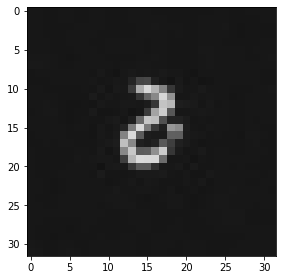

In [ ]:
from skimage import color
from skimage import io

img = x_train[1]
imgGray = color.rgb2gray(img)
io.imshow(imgGray)



Posmatrani region piksela nakon erozije:
[]


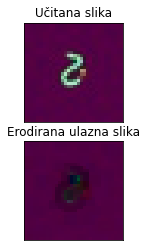

In [ ]:
kernel = np.ones((3,3),np.uint8)
eroded_img = cv2.erode(img,kernel,iterations = 1)
print("Posmatrani region piksela nakon erozije:")
print(eroded_img[43:53,223:233])

plt.gray()
plt.subplot(211),plt.imshow(img),plt.title('Učitana slika')
plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(eroded_img),plt.title('Erodirana ulazna slika')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from numpy import expand_dims
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# we first load the image
for j in range (0, len(x_train)):
  image = x_train[j]
  # we converting the image which is in PIL format into the numpy array, so that we can apply deep learning methods
  dataImage = img_to_array(image)
  # expanding dimension of the load image
  imageNew = expand_dims(dataImage, 0)
  # now here below we creating the object of the data augmentation class
  imageDataGen = ImageDataGenerator(rotation_range=25)
  # because as we alreay load image into the memory, so we are using flow() function, to apply transformation
  iterator = imageDataGen.flow(imageNew, batch_size=1)
  # below we generate augmented images and plotting for visualization
